<a href="https://colab.research.google.com/github/BFvandy/Nissan-Text-Mining-POC-with-Transformer/blob/main/SW_Plotting_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
cur_path = "/content/drive/My Drive/Nissan Internship/SW 2020-2022 Verbatim Small SUV"
os.chdir(cur_path)
!pwd

# Load Dataset

In [ ]:
cmt_final = pd.read_csv('SW_score_v1.csv')

In [ ]:
pd.set_option('display.max_columns', None)
cmt_final

,Make,Model,Purchased,Study Year,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,Age Range,Gender,Ethnicity,Income Bracket,Text,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Honda,CR-V,Honda CR-V Special Edition FWD,2022,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Sentiment Not Calculated,Age 41,Female,White,Income Unknown,The engine start stop/ gas save mode is not ve...,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Nissan,Rogue,Nissan Rogue SV AWD,2022,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Sentiment Not Calculated,Age 35,Male,White,"$100,001 - $125,000",We were not told the price of the vehicle goin...,0.0,0.000000,0.029433,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.011031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Nissan,Rogue,Nissan Rogue S AWD,2022,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Sentiment Not Calculated,Age 57,Male,White,Income Unknown,My Nissan Rogue is the perfect balance between...,0.0,0.000000,0.000000,0.984863,0.98799,0.000000,0.0,0.0,0.997018,0.0,0.993778,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974088,0.0,0.0,0.0,0.0,0.0,0.0
3,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Sentiment Not Calculated,Age 49,Female,Asian,"$65,001 - $70,000",I wish :\n1.there is a CD player installed. T...,0.0,0.640963,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,(None),NaN,Honda Civic,2015.0,Sentiment Not Calculated,Age 54,Female,White,"$200,001 - $300,000","The 2022 Honda CRV is a nice looking car, with...",0.0,0.000000,0.000000,0.000000,0.00000,0.048322,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106999,Honda,CR-V,Honda CR-V EX/EX-L FWD,2020,2020,None,18.0,None,16.0,Sentiment Not Calculated,Age 34,Female,Hispanic,"$150,001 - $175,000",G,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
107000,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Sentiment Not Calculated,Age 42,Male,White,"$100,001 - $125,000",.,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
107001,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Sentiment Not Calculated,Age 42,Male,White,"$100,001 - $125,000",.,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
107002,Honda,CR-V,Honda CR-V LX FWD,2020,2019,Honda CR-V,2015.0,Honda HR-V,2019.0,Sentiment Not Calculated,Age 59,Male,White,"$50,001 - $55,000",I,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cmt_final.replace(0, np.nan, inplace=True)

In [ ]:
cmt_final.insert(2,'Source','Strategic Window')

In [ ]:
cmt_final

,Make,Model,Source,Purchased,Study Year,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Sentiment,Age Range,Gender,Ethnicity,Income Bracket,Text,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Honda,CR-V,Strategic Window,Honda CR-V Special Edition FWD,2022,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Sentiment Not Calculated,Age 41,Female,White,Income Unknown,The engine start stop/ gas save mode is not ve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Strategic Window,Nissan Rogue SV AWD,2022,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Sentiment Not Calculated,Age 35,Male,White,"$100,001 - $125,000",We were not told the price of the vehicle goin...,NaN,NaN,0.029433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Strategic Window,Nissan Rogue S AWD,2022,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Sentiment Not Calculated,Age 57,Male,White,Income Unknown,My Nissan Rogue is the perfect balance between...,NaN,NaN,NaN,0.984863,0.98799,NaN,NaN,NaN,0.997018,NaN,0.993778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.974088,NaN,NaN,NaN,NaN,NaN,NaN
3,Honda,CR-V,Strategic Window,Honda CR-V EX/EX-L FWD,2022,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Sentiment Not Calculated,Age 49,Female,Asian,"$65,001 - $70,000",I wish :\n1.there is a CD player installed. T...,NaN,0.640963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Honda,CR-V,Strategic Window,Honda CR-V EX/EX-L FWD,2022,2022,(None),NaN,Honda Civic,2015.0,Sentiment Not Calculated,Age 54,Female,White,"$200,001 - $300,000","The 2022 Honda CRV is a nice looking car, with...",NaN,NaN,NaN,NaN,NaN,0.048322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106999,Honda,CR-V,Strategic Window,Honda CR-V EX/EX-L FWD,2020,2020,None,18.0,None,16.0,Sentiment Not Calculated,Age 34,Female,Hispanic,"$150,001 - $175,000",G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107000,Honda,CR-V,Strategic Window,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Sentiment Not Calculated,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107001,Honda,CR-V,Strategic Window,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Sentiment Not Calculated,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107002,Honda,CR-V,Strategic Window,Honda CR-V LX FWD,2020,2019,Honda CR-V,2015.0,Honda HR-V,2019.0,Sentiment Not Calculated,Age 59,Male,White,"$50,001 - $55,000",I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cmt_final.to_csv('SW_score_v3.csv', index = 'False')

In [ ]:
# cmt_final.to_excel('SW_score_v2.xlsx', index = 'False')

In [ ]:
cmt_final_fun = cmt_final.iloc[:,:32]
cmt_final_fun = cmt_final_fun.drop('Sentiment', axis=1)
cmt_final_fun

,Make,Model,Purchased,Study Year,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Age Range,Gender,Ethnicity,Income Bracket,Text,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
0,Honda,CR-V,Honda CR-V Special Edition FWD,2022,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Age 41,Female,White,Income Unknown,The engine start stop/ gas save mode is not ve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Nissan Rogue SV AWD,2022,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Age 35,Male,White,"$100,001 - $125,000",We were not told the price of the vehicle goin...,NaN,NaN,0.029433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011031,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Nissan Rogue S AWD,2022,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Age 57,Male,White,Income Unknown,My Nissan Rogue is the perfect balance between...,NaN,NaN,NaN,0.984863,0.98799,NaN,NaN,NaN,0.997018,NaN,0.993778,NaN,NaN,NaN,NaN,NaN,NaN
3,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Age 49,Female,Asian,"$65,001 - $70,000",I wish :\n1.there is a CD player installed. T...,NaN,0.640963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,(None),NaN,Honda Civic,2015.0,Age 54,Female,White,"$200,001 - $300,000","The 2022 Honda CRV is a nice looking car, with...",NaN,NaN,NaN,NaN,NaN,0.048322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106999,Honda,CR-V,Honda CR-V EX/EX-L FWD,2020,2020,None,18.0,None,16.0,Age 34,Female,Hispanic,"$150,001 - $175,000",G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107000,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107001,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107002,Honda,CR-V,Honda CR-V LX FWD,2020,2019,Honda CR-V,2015.0,Honda HR-V,2019.0,Age 59,Male,White,"$50,001 - $55,000",I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cmt_final_pers = cmt_final.drop(cmt_final.iloc[:,15:32], axis=1)
cmt_final_pers = cmt_final_pers.drop('Sentiment', axis=1)
cmt_final_pers

,Make,Model,Purchased,Study Year,Purchased Year,Disposed,Disposed Model Year,Rejected,Rejected Model Year,Age Range,Gender,Ethnicity,Income Bracket,Text,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
0,Honda,CR-V,Honda CR-V Special Edition FWD,2022,2021,Honda Civic,2019.0,Honda HR-V,2022.0,Age 41,Female,White,Income Unknown,The engine start stop/ gas save mode is not ve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nissan,Rogue,Nissan Rogue SV AWD,2022,2021,Ford Fusion,2012.0,Toyota Highlander,2021.0,Age 35,Male,White,"$100,001 - $125,000",We were not told the price of the vehicle goin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nissan,Rogue,Nissan Rogue S AWD,2022,2021,Chevrolet Spark,2016.0,Hyundai Santa Fe,2021.0,Age 57,Male,White,Income Unknown,My Nissan Rogue is the perfect balance between...,NaN,NaN,NaN,NaN,NaN,0.974088,NaN,NaN,NaN,NaN,NaN,NaN
3,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,Nissan Versa Note (Hatchback),2018.0,Lexus LX,2022.0,Age 49,Female,Asian,"$65,001 - $70,000",I wish :\n1.there is a CD player installed. T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Honda,CR-V,Honda CR-V EX/EX-L FWD,2022,2022,(None),NaN,Honda Civic,2015.0,Age 54,Female,White,"$200,001 - $300,000","The 2022 Honda CRV is a nice looking car, with...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106999,Honda,CR-V,Honda CR-V EX/EX-L FWD,2020,2020,None,18.0,None,16.0,Age 34,Female,Hispanic,"$150,001 - $175,000",G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107000,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107001,Honda,CR-V,Honda CR-V EX/EX-L AWD,2020,2019,GMC Terrain,2013.0,Honda CR-V,2020.0,Age 42,Male,White,"$100,001 - $125,000",.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107002,Honda,CR-V,Honda CR-V LX FWD,2020,2019,Honda CR-V,2015.0,Honda HR-V,2019.0,Age 59,Male,White,"$50,001 - $55,000",I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_count = cmt_final.count()
df_count
# count how many values are there (not NaN values)

Make                        107004
Model                       107004
Purchased                   107004
Study Year                  107004
Purchased Year              107004
 Disposed                   107004
Disposed Model Year          76693
Rejected                    107004
Rejected Model Year          55588
Sentiment                   107004
Age Range                   107004
Gender                      107004
Ethnicity                   103410
Income Bracket              107004
Text                        104167
dependable                   16745
lasts long                    7218
value for money               4894
quality fit and finish        9237
attractive styling            7306
safe                          9473
retains resale value          2548
driver comfort               10760
fun to drive                  8709
advanced features            10703
responsive handling           7821
prestigious                  10613
dealerships                   2502
fuel efficient      

In [ ]:
avg_by_model = cmt_final.groupby(['Model']).mean()
avg_by_model

,Study Year,Purchased Year,Disposed Model Year,Rejected Model Year,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
Model,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bronco Sport,2021.304282,2021.108941,2014.289885,2020.700176,0.882312,0.718287,0.870106,0.892740,0.930734,0.853466,0.801264,0.858233,0.974851,0.911304,0.827505,0.810058,0.652727,0.849312,0.747280,0.624029,0.795532,0.902748,0.869079,0.873072,0.796981,0.719859,0.896726,0.846879,0.818586,0.940470,0.862291,0.379234,0.591596
CR-V,2020.871483,2020.572004,1999.274263,1981.145574,0.905740,0.791154,0.867009,0.916436,0.910914,0.905718,0.870574,0.857626,0.946158,0.871965,0.867618,0.820025,0.785008,0.768320,0.623513,0.614410,0.781764,0.954497,0.678683,0.861916,0.848937,0.600738,0.795664,0.856487,0.536027,0.890231,0.835455,0.232201,0.399029
CX-5,2020.754822,2020.525021,1986.504244,2003.647623,0.910921,0.757342,0.899587,0.902672,0.944503,0.918300,0.813528,0.838414,0.972862,0.903338,0.869897,0.868748,0.731310,0.717772,0.735076,0.596112,0.829777,0.931581,0.720836,0.860096,0.859381,0.681989,0.880516,0.834276,0.691561,0.903524,0.884950,0.275310,0.430861
Equinox,2020.634224,2020.647804,1943.047957,1782.553131,0.863649,0.754878,0.883660,0.864377,0.942623,0.901692,0.791162,0.870809,0.959784,0.870128,0.867916,0.795061,0.880975,0.799280,0.741106,0.511105,0.845271,0.937735,0.781865,0.803729,0.843497,0.665944,0.874526,0.852557,0.620667,0.892763,0.824903,0.260889,0.397604
Escape,2020.683374,2020.340465,2013.933795,1970.484716,0.864914,0.746425,0.803902,0.877918,0.920938,0.878138,0.739217,0.855530,0.945020,0.866509,0.852406,0.744054,0.772990,0.792768,0.634938,0.467253,0.694185,0.929554,0.672172,0.806481,0.815746,0.575912,0.745626,0.837210,0.555083,0.885655,0.772776,0.218062,0.398756
Forester,2020.728445,2020.670408,2002.438863,1957.825035,0.907686,0.800092,0.873132,0.932207,0.925128,0.922978,0.898036,0.860519,0.948065,0.899728,0.865304,0.855068,0.755357,0.742506,0.671634,0.649044,0.832992,0.947975,0.705168,0.893767,0.850477,0.657982,0.825255,0.877641,0.571480,0.886009,0.866615,0.248114,0.419798
RAV4,2020.720784,2020.603918,1990.530138,1958.528592,0.905102,0.794865,0.837217,0.896175,0.951371,0.899730,0.863097,0.840556,0.952296,0.876493,0.853845,0.801741,0.696915,0.835433,0.670565,0.673560,0.728020,0.933659,0.743402,0.872871,0.864989,0.572370,0.790700,0.852644,0.530735,0.917337,0.860341,0.255858,0.418468
Rogue,2020.882350,2020.619166,1997.656788,1988.753085,0.868465,0.749409,0.866012,0.909347,0.954620,0.906433,0.804494,0.869048,0.970393,0.905532,0.875943,0.816789,0.766203,0.789234,0.665069,0.611208,0.812089,0.923555,0.686049,0.863725,0.821294,0.733363,0.880412,0.868933,0.637676,0.899394,0.866043,0.281842,0.438373
Sportage,2020.634603,2020.897999,1991.051664,1962.942708,0.865616,0.765016,0.859676,0.876308,0.945519,0.869217,0.732581,0.831821,0.946697,0.877180,0.860968,0.775404,0.651393,0.735145,0.790928,0.449905,0.764384,0.867145,0.645883,0.856689,0.819791,0.627180,0.831670,0.825856,0.550696,0.889976,0.817828,0.271839,0.385783


In [ ]:
avg_by_model.to_excel('SW_avg_by_model_table.xlsx',index = False)

# Correlation Heatmap

In [ ]:
# 17 functional attributes

fun_corr = cmt_final_fun.iloc[:, 14:]
fun_corr.corr()

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
dependable,1.000000,0.706259,0.825062,0.799054,0.616289,0.904989,0.865890,0.652259,0.628536,0.209805,0.792512,0.625441,0.763187,0.649265,0.341019,0.705198,0.680360
lasts long,0.706259,1.000000,0.482872,0.551704,0.291207,0.586120,0.722984,0.488566,0.397917,0.116004,0.529743,0.511450,0.384262,0.505008,0.220947,0.538840,0.438595
value for money,0.825062,0.482872,1.000000,0.893131,0.756297,0.871996,0.866434,0.729067,0.625596,0.337713,0.844052,0.685960,0.878466,0.739094,0.234233,0.769000,0.809368
quality fit and finish,0.799054,0.551704,0.893131,1.000000,0.809484,0.849021,0.867718,0.710078,0.679065,0.354923,0.826988,0.677108,0.831057,0.637907,0.229350,0.717729,0.675053
attractive styling,0.616289,0.291207,0.756297,0.809484,1.000000,0.703140,0.688645,0.623497,0.803660,0.491414,0.739552,0.690129,0.664566,0.665475,0.300242,0.709954,0.621587
safe,0.904989,0.586120,0.871996,0.849021,0.703140,1.000000,0.872072,0.751191,0.668231,0.316838,0.831709,0.653449,0.811733,0.695377,0.326486,0.761437,0.747537
retains resale value,0.865890,0.722984,0.866434,0.867718,0.688645,0.872072,1.000000,0.671016,0.712373,0.327912,0.804291,0.714624,0.741116,0.734671,0.164728,0.784331,0.766620
driver comfort,0.652259,0.488566,0.729067,0.710078,0.623497,0.751191,0.671016,1.000000,0.617893,0.370532,0.794786,0.563693,0.714298,0.705817,0.375876,0.737031,0.670425
fun to drive,0.628536,0.397917,0.625596,0.679065,0.803660,0.668231,0.712373,0.617893,1.000000,0.307505,0.771138,0.533792,0.478834,0.518779,0.401525,0.606966,0.525602
advanced features,0.209805,0.116004,0.337713,0.354923,0.491414,0.316838,0.327912,0.370532,0.307505,1.000000,0.349813,0.547288,0.315050,0.411284,0.312215,0.436624,0.360831


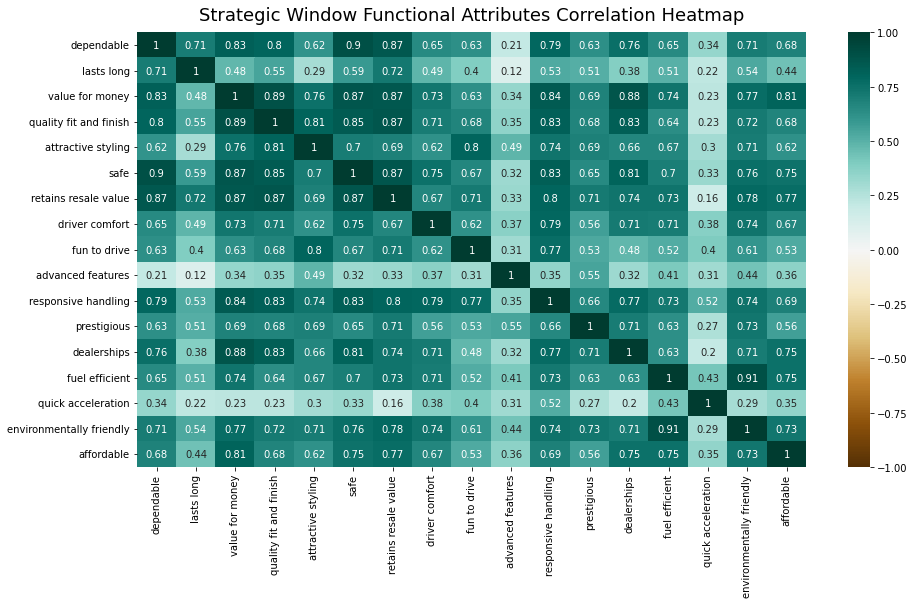

In [ ]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(fun_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Strategic Window Functional Attributes Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

In [ ]:
# save heatmap as .png file
plt.savefig('SW_functional_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
#12 personality attributes
pers_corr = cmt_final_pers.iloc[:, 14:]
pers_corr.corr()

,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
trusted,1.000000,0.607739,0.758196,0.764962,0.263958,0.466183,0.763203,0.008075,0.441728,0.413205,0.310661,-0.276184
leader,0.607739,1.000000,0.687456,0.688141,0.491873,0.654528,0.591302,0.277105,0.600796,0.659045,0.345892,0.025871
responsible,0.758196,0.687456,1.000000,0.709648,0.416377,0.636586,0.782413,0.163730,0.518652,0.637351,0.304705,-0.082443
confident,0.764962,0.688141,0.709648,1.000000,0.259502,0.549259,0.747031,-0.035404,0.564534,0.551057,0.413187,-0.226109
innovative,0.263958,0.491873,0.416377,0.259502,1.000000,0.735204,0.400758,0.686428,0.464661,0.622232,0.494747,0.325799
exciting,0.466183,0.654528,0.636586,0.549259,0.735204,1.000000,0.589010,0.582581,0.736052,0.775507,0.474699,0.225875
practical,0.763203,0.591302,0.782413,0.747031,0.400758,0.589010,1.000000,0.104914,0.445397,0.592923,0.368852,-0.131324
adventurous,0.008075,0.277105,0.163730,-0.035404,0.686428,0.582581,0.104914,1.000000,0.432666,0.379229,0.384903,0.548391
passionate,0.441728,0.600796,0.518652,0.564534,0.464661,0.736052,0.445397,0.432666,1.000000,0.670817,0.291236,0.150262
distinctive,0.413205,0.659045,0.637351,0.551057,0.622232,0.775507,0.592923,0.379229,0.670817,1.000000,0.355791,0.135420


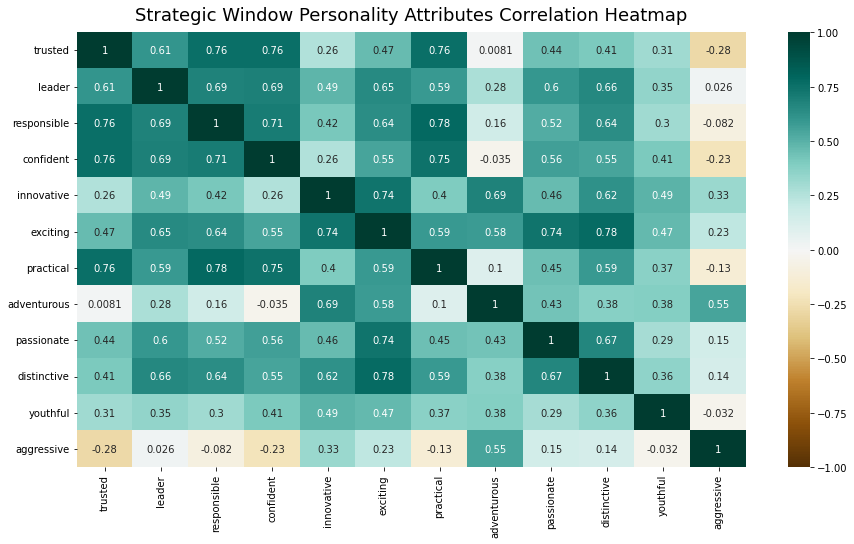

In [ ]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(pers_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Strategic Window Personality Attributes Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

In [ ]:
# save heatmap as .png file
plt.savefig('SW_personality_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# Line Plot

In [ ]:
avg_fun_by_model = cmt_final_fun.groupby(['Model']).mean()
avg_fun_by_model = avg_fun_by_model.iloc[:,4:]
avg_fun_by_model

,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
Model,,,,,,,,,,,,,,,,,
Bronco Sport,0.882312,0.718287,0.870106,0.892740,0.930734,0.853466,0.801264,0.858233,0.974851,0.911304,0.827505,0.810058,0.652727,0.849312,0.747280,0.624029,0.795532
CR-V,0.905740,0.791154,0.867009,0.916436,0.910914,0.905718,0.870574,0.857626,0.946158,0.871965,0.867618,0.820025,0.785008,0.768320,0.623513,0.614410,0.781764
CX-5,0.910921,0.757342,0.899587,0.902672,0.944503,0.918300,0.813528,0.838414,0.972862,0.903338,0.869897,0.868748,0.731310,0.717772,0.735076,0.596112,0.829777
Equinox,0.863649,0.754878,0.883660,0.864377,0.942623,0.901692,0.791162,0.870809,0.959784,0.870128,0.867916,0.795061,0.880975,0.799280,0.741106,0.511105,0.845271
Escape,0.864914,0.746425,0.803902,0.877918,0.920938,0.878138,0.739217,0.855530,0.945020,0.866509,0.852406,0.744054,0.772990,0.792768,0.634938,0.467253,0.694185
Forester,0.907686,0.800092,0.873132,0.932207,0.925128,0.922978,0.898036,0.860519,0.948065,0.899728,0.865304,0.855068,0.755357,0.742506,0.671634,0.649044,0.832992
RAV4,0.905102,0.794865,0.837217,0.896175,0.951371,0.899730,0.863097,0.840556,0.952296,0.876493,0.853845,0.801741,0.696915,0.835433,0.670565,0.673560,0.728020
Rogue,0.868465,0.749409,0.866012,0.909347,0.954620,0.906433,0.804494,0.869048,0.970393,0.905532,0.875943,0.816789,0.766203,0.789234,0.665069,0.611208,0.812089
Sportage,0.865616,0.765016,0.859676,0.876308,0.945519,0.869217,0.732581,0.831821,0.946697,0.877180,0.860968,0.775404,0.651393,0.735145,0.790928,0.449905,0.764384


In [ ]:
# average score for each attribute
fun_attr_avg = cmt_final_fun.iloc[:,4:].mean(skipna=True)

avg_fun_by_model.loc['Attri_mean'] = avg_fun_by_model.mean()
avg_fun_by_model = avg_fun_by_model.rename_axis('Attributes',axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
avg_fun_by_model

Attributes,dependable,lasts long,value for money,quality fit and finish,attractive styling,safe,retains resale value,driver comfort,fun to drive,advanced features,responsive handling,prestigious,dealerships,fuel efficient,quick acceleration,environmentally friendly,affordable
Model,,,,,,,,,,,,,,,,,
Bronco Sport,0.882312,0.718287,0.870106,0.892740,0.930734,0.853466,0.801264,0.858233,0.974851,0.911304,0.827505,0.810058,0.652727,0.849312,0.747280,0.624029,0.795532
CR-V,0.905740,0.791154,0.867009,0.916436,0.910914,0.905718,0.870574,0.857626,0.946158,0.871965,0.867618,0.820025,0.785008,0.768320,0.623513,0.614410,0.781764
CX-5,0.910921,0.757342,0.899587,0.902672,0.944503,0.918300,0.813528,0.838414,0.972862,0.903338,0.869897,0.868748,0.731310,0.717772,0.735076,0.596112,0.829777
Equinox,0.863649,0.754878,0.883660,0.864377,0.942623,0.901692,0.791162,0.870809,0.959784,0.870128,0.867916,0.795061,0.880975,0.799280,0.741106,0.511105,0.845271
Escape,0.864914,0.746425,0.803902,0.877918,0.920938,0.878138,0.739217,0.855530,0.945020,0.866509,0.852406,0.744054,0.772990,0.792768,0.634938,0.467253,0.694185
Forester,0.907686,0.800092,0.873132,0.932207,0.925128,0.922978,0.898036,0.860519,0.948065,0.899728,0.865304,0.855068,0.755357,0.742506,0.671634,0.649044,0.832992
RAV4,0.905102,0.794865,0.837217,0.896175,0.951371,0.899730,0.863097,0.840556,0.952296,0.876493,0.853845,0.801741,0.696915,0.835433,0.670565,0.673560,0.728020
Rogue,0.868465,0.749409,0.866012,0.909347,0.954620,0.906433,0.804494,0.869048,0.970393,0.905532,0.875943,0.816789,0.766203,0.789234,0.665069,0.611208,0.812089
Sportage,0.865616,0.765016,0.859676,0.876308,0.945519,0.869217,0.732581,0.831821,0.946697,0.877180,0.860968,0.775404,0.651393,0.735145,0.790928,0.449905,0.764384


In [ ]:
avg_fun_by_model_trans = avg_fun_by_model.T
avg_fun_by_model_trans

Model,Bronco Sport,CR-V,CX-5,Equinox,Escape,Forester,RAV4,Rogue,Sportage,Tucson,Attri_mean
Attributes,,,,,,,,,,,
dependable,0.882312,0.905740,0.910921,0.863649,0.864914,0.907686,0.905102,0.868465,0.865616,0.863704,0.883811
lasts long,0.718287,0.791154,0.757342,0.754878,0.746425,0.800092,0.794865,0.749409,0.765016,0.769148,0.764662
value for money,0.870106,0.867009,0.899587,0.883660,0.803902,0.873132,0.837217,0.866012,0.859676,0.881330,0.864163
quality fit and finish,0.892740,0.916436,0.902672,0.864377,0.877918,0.932207,0.896175,0.909347,0.876308,0.905656,0.897384
attractive styling,0.930734,0.910914,0.944503,0.942623,0.920938,0.925128,0.951371,0.954620,0.945519,0.948621,0.937497
safe,0.853466,0.905718,0.918300,0.901692,0.878138,0.922978,0.899730,0.906433,0.869217,0.896340,0.895201
retains resale value,0.801264,0.870574,0.813528,0.791162,0.739217,0.898036,0.863097,0.804494,0.732581,0.868494,0.818245
driver comfort,0.858233,0.857626,0.838414,0.870809,0.855530,0.860519,0.840556,0.869048,0.831821,0.849575,0.853213
fun to drive,0.974851,0.946158,0.972862,0.959784,0.945020,0.948065,0.952296,0.970393,0.946697,0.959136,0.957526


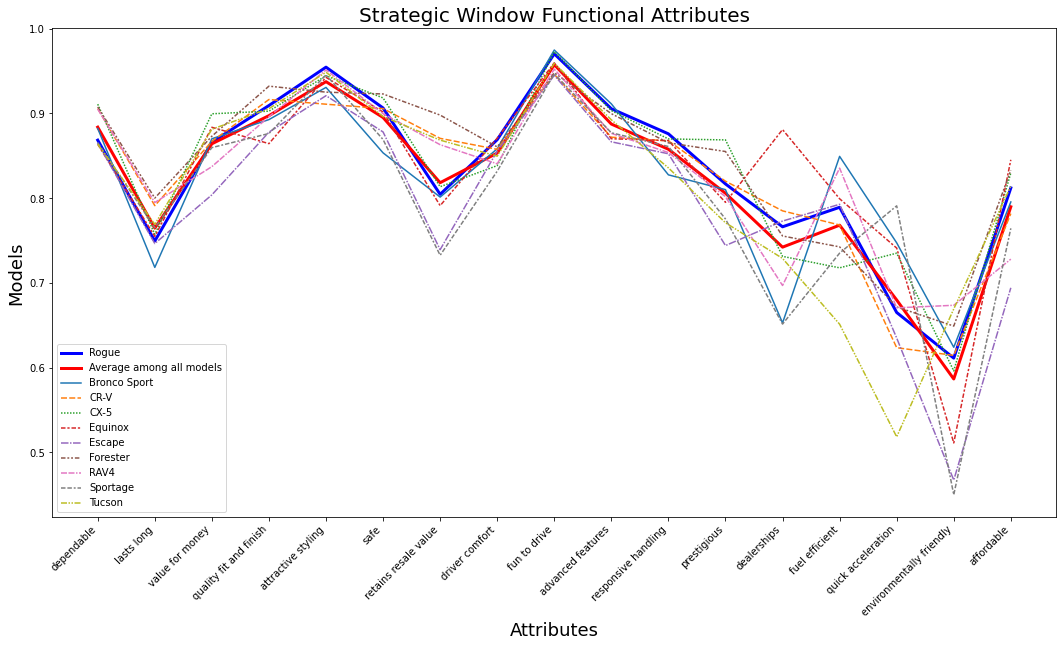

In [ ]:
df = avg_fun_by_model_trans
#df[df.columns.drop(['Rogue', 'Attri_mean'])]

plt.figure(figsize=(18,9))
#make rogue and attributes average different colors
sns.lineplot(data=avg_fun_by_model_trans['Rogue'],lw=3,color = "blue")
sns.lineplot(data=avg_fun_by_model_trans['Attri_mean'],lw=3,color = "red")

#adjujst legend
sns.lineplot(data=df[df.columns.drop(['Rogue', 'Attri_mean'])])
plt.legend(labels=["Rogue","Average among all models",'Bronco Sport','CR-V','CX-5','Equinox', 'Escape','Forester','RAV4','Sportage','Tucson'])

# format x and y coordinates
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attributes', fontsize=18)
plt.ylabel('Models', fontsize=18)

plt.title('Strategic Window Functional Attributes', fontsize=20)
plt.show()

In [ ]:
# save heatmap as .png file
plt.savefig('Reddit_functional_lineplot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [ ]:
avg_pers_by_model = cmt_final_pers.iloc[:,[1,14,15,16,17,18,19,20,21,22,23,24,25]].groupby(['Model']).mean()
avg_pers_by_model

,trusted,leader,responsible,confident,innovative,exciting,practical,adventurous,passionate,distinctive,youthful,aggressive
Model,,,,,,,,,,,,
Bronco Sport,0.902748,0.869079,0.873072,0.796981,0.719859,0.896726,0.846879,0.818586,0.940470,0.862291,0.379234,0.591596
CR-V,0.954497,0.678683,0.861916,0.848937,0.600738,0.795664,0.856487,0.536027,0.890231,0.835455,0.232201,0.399029
CX-5,0.931581,0.720836,0.860096,0.859381,0.681989,0.880516,0.834276,0.691561,0.903524,0.884950,0.275310,0.430861
Equinox,0.937735,0.781865,0.803729,0.843497,0.665944,0.874526,0.852557,0.620667,0.892763,0.824903,0.260889,0.397604
Escape,0.929554,0.672172,0.806481,0.815746,0.575912,0.745626,0.837210,0.555083,0.885655,0.772776,0.218062,0.398756
Forester,0.947975,0.705168,0.893767,0.850477,0.657982,0.825255,0.877641,0.571480,0.886009,0.866615,0.248114,0.419798
RAV4,0.933659,0.743402,0.872871,0.864989,0.572370,0.790700,0.852644,0.530735,0.917337,0.860341,0.255858,0.418468
Rogue,0.923555,0.686049,0.863725,0.821294,0.733363,0.880412,0.868933,0.637676,0.899394,0.866043,0.281842,0.438373
Sportage,0.867145,0.645883,0.856689,0.819791,0.627180,0.831670,0.825856,0.550696,0.889976,0.817828,0.271839,0.385783


In [ ]:
# average score for each attribute
pers_attr_avg = avg_pers_by_model.mean(skipna=True)

avg_pers_by_model.loc['Attri_mean'] = avg_pers_by_model.mean()
avg_pers_by_model = avg_pers_by_model.rename_axis('Attributes',axis=1)
avg_pers_by_model_trans = avg_pers_by_model.T
avg_pers_by_model_trans

Model,Bronco Sport,CR-V,CX-5,Equinox,Escape,Forester,RAV4,Rogue,Sportage,Tucson,Attri_mean
Attributes,,,,,,,,,,,
trusted,0.902748,0.954497,0.931581,0.937735,0.929554,0.947975,0.933659,0.923555,0.867145,0.933783,0.926223
leader,0.869079,0.678683,0.720836,0.781865,0.672172,0.705168,0.743402,0.686049,0.645883,0.753214,0.725635
responsible,0.873072,0.861916,0.860096,0.803729,0.806481,0.893767,0.872871,0.863725,0.856689,0.846192,0.853854
confident,0.796981,0.848937,0.859381,0.843497,0.815746,0.850477,0.864989,0.821294,0.819791,0.833760,0.835485
innovative,0.719859,0.600738,0.681989,0.665944,0.575912,0.657982,0.572370,0.733363,0.627180,0.704848,0.654019
exciting,0.896726,0.795664,0.880516,0.874526,0.745626,0.825255,0.790700,0.880412,0.831670,0.832633,0.835373
practical,0.846879,0.856487,0.834276,0.852557,0.837210,0.877641,0.852644,0.868933,0.825856,0.843630,0.849611
adventurous,0.818586,0.536027,0.691561,0.620667,0.555083,0.571480,0.530735,0.637676,0.550696,0.587631,0.610014
passionate,0.940470,0.890231,0.903524,0.892763,0.885655,0.886009,0.917337,0.899394,0.889976,0.872732,0.897809


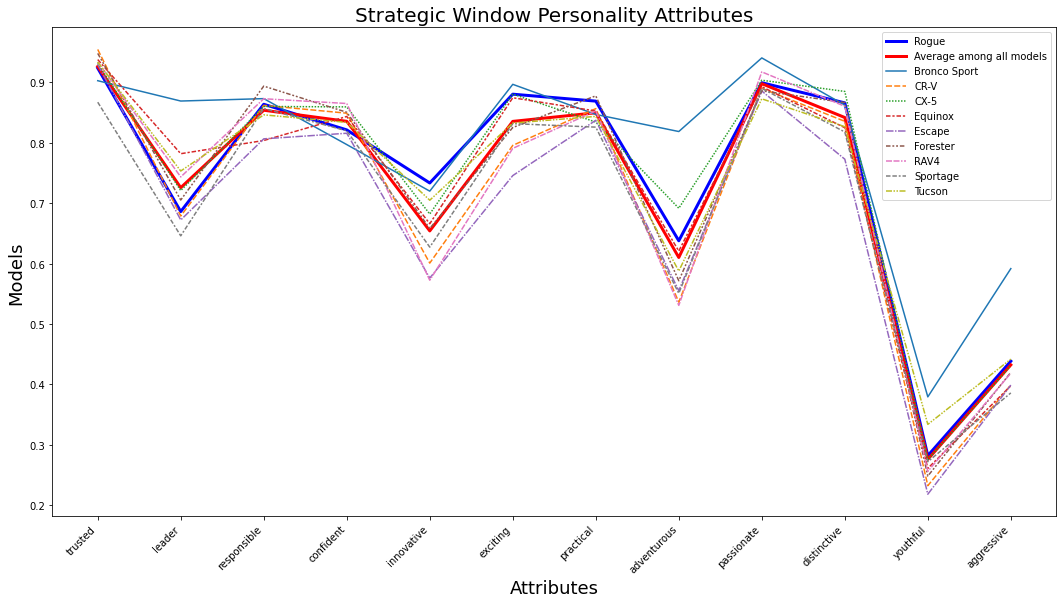

In [ ]:
df = avg_pers_by_model_trans
#df[df.columns.drop(['Rogue', 'Attri_mean'])]

plt.figure(figsize=(18,9))
#make rogue and attributes average different colors
sns.lineplot(data=avg_pers_by_model_trans['Rogue'],lw=3,color = "blue")
sns.lineplot(data=avg_pers_by_model_trans['Attri_mean'],lw=3,color = "red")

#adjujst legend
sns.lineplot(data=df[df.columns.drop(['Rogue', 'Attri_mean'])])
plt.legend(labels=["Rogue","Average among all models",'Bronco Sport','CR-V','CX-5','Equinox', 'Escape','Forester','RAV4','Sportage','Tucson'])

# format x and y coordinates
plt.xticks(rotation=45, ha='right')
plt.xlabel('Attributes', fontsize=18)
plt.ylabel('Models', fontsize=18)

#set title
plt.title('Strategic Window Personality Attributes', fontsize=20)
plt.show()

In [ ]:
# save heatmap as .png file
plt.savefig('Reddit_personality_lineplot.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>